# G-Formula for time-varying causal inference.

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from causallib.time_varying.treament_strategy import Observational, CFBernoulli
from causallib.time_varying.GFormula import GFormula

# Load the data.
(Data taken from 'gnet_robust_rnn' project)

In [2]:
df_obs = pd.read_csv('../../gnet_robust_rnn/easiest_sim_x2/data/easiest_gnet_data_obs_2x.csv') #, index_col=0)

In [3]:
df_obs_ids = df_obs.id.unique()
print(len(df_obs_ids))
# Considering #10000 patient data for local run
df_obs = df_obs[:10000]
df_obs.head()

10000


,A,X,X2,time,id
0,0,-0.326233,1.329799,1,1
1,1,1.014886,1.272429,2,1
2,0,0.960009,0.414641,3,1
3,0,2.940409,-1.539950,4,1
4,1,3.767785,-0.928567,5,1


Preparing data for X and a to fit the models

In [4]:
# df_obs.columns.tolist()
X = df_obs[['id', 'time', 'X', 'X2']]
a = df_obs[['A']]

# Initialize
1. Covariate models in a sorted order for each covariate
2. Treatment model

In [5]:
covariate_models = {
    'X':  LinearRegression(),
    'X2': LinearRegression()
}
treatment_model = LogisticRegression(solver="liblinear")

In [6]:
gFormula = GFormula(treatment_model=treatment_model,
                    covariate_models=covariate_models,
                    outcome_model=None,
                    refit_models=False,
                    random_state=None,
                    n_obsv=5,
                    n_sims=3,
                    n_steps=50,
                    mode='normal',
                    resid_val=None,
                    )

In [7]:
X.head()

,id,time,X,X2
0,1,1,-0.326233,1.329799
1,1,2,1.014886,1.272429
2,1,3,0.960009,0.414641
3,1,4,2.940409,-1.539950
4,1,5,3.767785,-0.928567


In [8]:
a.head()

,A
0,0
1,1
2,0
3,0
4,1


# Fit the covariate and treatment models prior to estimate the outcome

In [9]:
gFormula.fit(X, a, t=None, y=None)

/Users/julinamaharjan/opt/anaconda3/envs/j_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GFormula(all_cols=['prev_X', 'prev_X2', 'prev_A', 'X', 'X2', 'A'], covariate_cols=['X', 'X2'], covariate_models={'X': LinearRegression(), 'X2': LinearRegression()}, id_col=id, mode=normal, n_obsv=5, n_sims=3, n_steps=50, outcome_model=None, predict_proba=False, prev_covariate_cols=['prev_X', 'prev_X2'], prev_treatment_cols=['prev_A'], random_state=None, refit_models=False, resid_val=None, time_col=time, treatment_cols=['A'], treatment_model=LogisticRegression(solver='liblinear'), y_col=None)

# Estimate the outcomes
Define treatment strategy to be used to generate the treatment action for the simulation.

In [10]:
# treatment_strategy = CFBernoulli()
treatment_strategy = Observational(inverse_transform=None)

Estimate the outcome in individual level

In [11]:
a = df_obs[['id', 'A']]
est_outcome = gFormula.estimate_individual_outcome(
                                                    X,
                                                    a,
                                                    t=None,
                                                    y=None,
                                                    treatment_strategy=treatment_strategy
                                                )
est_outcome

,X,X2,A,id,time
0,4.472381,0.080507,0.333333,1,5
1,4.824207,0.207686,0.333333,1,6
2,4.845350,-0.374902,0.333333,1,7
3,4.876399,0.411679,0.666667,1,8
4,4.284430,-0.774597,0.000000,1,9
...,...,...,...,...,...
45,18.310063,0.225418,1.000000,200,50
46,18.349422,0.152895,0.000000,200,51
47,20.469624,0.700513,0.666667,200,52
48,21.331247,-0.460019,0.666667,200,53


Estimate the outcome in population level

In [12]:
a = df_obs[['id', 'A']]
pop_outcome = gFormula.estimate_population_outcome(X, a, t=None, y=None, treatment_strategy=treatment_strategy )
pop_outcome.reset_index(inplace=True)
pop_outcome

,time,X,X2,A,id
0,5,2.783921,0.105556,0.441667,100.5
1,6,3.233304,-0.084728,0.441667,100.5
2,7,3.656944,0.037886,0.415000,100.5
3,8,4.067453,-0.030398,0.481667,100.5
4,9,4.518326,-0.015073,0.431667,100.5
5,10,4.956478,0.048027,0.486667,100.5
6,11,5.455631,0.038483,0.440000,100.5
7,12,5.979490,0.074160,0.456667,100.5
8,13,6.400235,0.006724,0.418333,100.5
9,14,6.919598,0.016719,0.481667,100.5


In [13]:
obsv = df_obs.groupby(df_obs.time).mean()
obsv.reset_index(inplace=True)
obsv

,time,A,X,X2,id
0,1,0.535,0.610786,-0.093850,100.5
1,2,0.355,1.044583,-0.051887,100.5
2,3,0.500,1.453703,0.032363,100.5
3,4,0.370,1.823370,-0.022501,100.5
4,5,0.460,2.347431,-0.052592,100.5
5,6,0.435,2.734929,0.019402,100.5
6,7,0.405,3.102645,-0.049093,100.5
7,8,0.440,3.585096,-0.063277,100.5
8,9,0.380,3.932199,0.010257,100.5
9,10,0.455,4.373784,-0.031365,100.5


# Plot the Graph (Counterfactual Vs Observational) for covariates 'X', 'X2' and treatment 'a'.

Plot for covariate 'X'

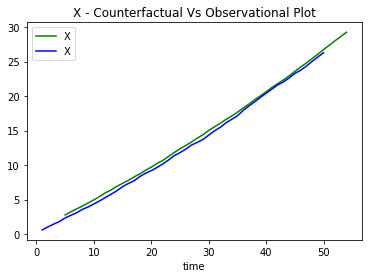

In [14]:
import matplotlib.pyplot as plt
#Get current axis
ax = plt.gca()
pop_outcome.plot(kind = 'line', x = 'time', y = 'X', color = 'green',ax = ax)
obsv.plot(kind = 'line', x = 'time', y = 'X', color = 'blue',ax = ax)
plt.title('X - Counterfactual Vs Observational Plot')
plt.show()

Plot for covariate 'X2'

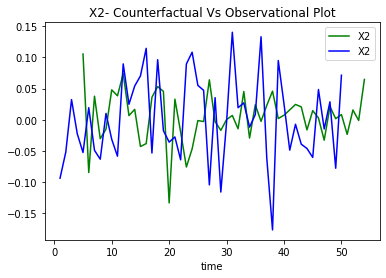

In [15]:
ax = plt.gca()
pop_outcome.plot(kind = 'line', x = 'time', y = 'X2', color = 'green',ax = ax)
obsv.plot(kind = 'line', x = 'time', y = 'X2', color = 'blue',ax = ax)
plt.title('X2- Counterfactual Vs Observational Plot')
plt.show()

Plot for treatment 'a'

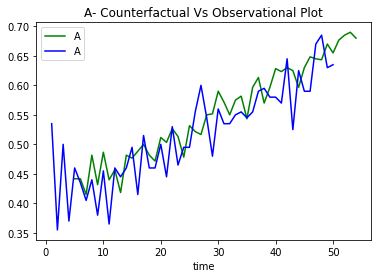

In [16]:
ax = plt.gca()
pop_outcome.plot(kind = 'line', x = 'time', y = 'A', color = 'green',ax = ax)
obsv.plot(kind = 'line', x = 'time', y = 'A', color = 'blue', ax = ax)
plt.title('A- Counterfactual Vs Observational Plot')
plt.show()